In [26]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

from numpy import where

import scipy.stats as stats
from scipy.special import inv_boxcox   
import os #we will use the function listdir to list files in a folder
import math
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
#1)In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
#2)Try a simple linear regression with all the data to see whether we are getting good results.
#3)Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
#4)Use the function to check LinearRegressor and KNeighborsRegressor.
#5)You can check also the MLPRegressor for this task!
#6)Check and discuss the results.

In [8]:
data = pd.read_csv('C:/Users/Ouroboros/lab-cleaning-categorical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv') 
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
data.columns = data.columns.str.lower().str.replace(" ", "_")
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [11]:
num = data.select_dtypes(np.number)

In [12]:
cat = data.select_dtypes(np.object)

In [13]:
#1)In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [14]:
y = num['total_claim_amount']
X = num.drop('total_claim_amount', axis = 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)

In [16]:
#2)Try a simple linear regression with all the data to see whether we are getting good results.

In [17]:
def lin_reg(y, X, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train )
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    print("R2 =", round(r2,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

In [18]:
predictions1, y_test1, r2_1 = lin_reg(y, X, test_size=0.24)

R2 = 0.51
RMSE = 199.88
MSE = 39953.09
MAE = 144.51


In [19]:
def diff_df(y_test, predictions):
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    results = results.sort_values('diff', ascending=False).head(10)
    return results

In [20]:
results = diff_df(y_test, predictions1)
results

,true,pred,diff
5074,2759.794354,1453.601489,1306.192865
9049,2452.894264,1179.514267,1273.379997
1626,2201.327879,1064.164604,1137.163275
8275,1985.999807,953.018599,1032.981208
248,2345.413441,1363.096940,982.316501
7741,115.166422,1057.416074,942.249652
7136,1961.162049,1030.658129,930.503920
3981,32.978158,784.226673,751.248515
3881,1.587888,743.899225,742.311337
8255,1532.080871,792.309502,739.771369


In [21]:
#3)Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [22]:
def modeling(y, X, models=[], test_size=0.3):
    for model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model.fit(X_train, y_train )
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        r2_adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        RMSE = mean_squared_error(y_test, predictions, squared=False)
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)
        print(model, 'metrics are: '), print("R2 =", round(r2,2)), print("R2 adjusted =", round(r2_adj,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

In [23]:
#4)Use the function to check LinearRegressor and KNeighborsRegressor.

In [29]:
predictions, y_test, r2 = modeling(y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=4)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.51
R2 adjusted = 0.51
RMSE = 199.88
MSE = 39953.09
MAE = 144.51
KNeighborsRegressor(n_neighbors=4) metrics are: 
R2 = 0.24
R2 adjusted = 0.23
RMSE = 249.11
MSE = 62055.96
MAE = 169.95


In [25]:
#5)You can check also the MLPRegressor for this task!

In [30]:
predictions, y_test, r2 = modeling(y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=4), MLPRegressor(max_iter=100)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.51
R2 adjusted = 0.51
RMSE = 199.88
MSE = 39953.09
MAE = 144.51
KNeighborsRegressor(n_neighbors=4) metrics are: 
R2 = 0.24
R2 adjusted = 0.23
RMSE = 249.11
MSE = 62055.96
MAE = 169.95
MLPRegressor(max_iter=100) metrics are: 
R2 = 0.53
R2 adjusted = 0.53
RMSE = 195.97
MSE = 38402.88
MAE = 145.71


In [28]:
#6)Check and discuss the results.

In [31]:
scores = []
for i in range(2,15): 
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'R2')

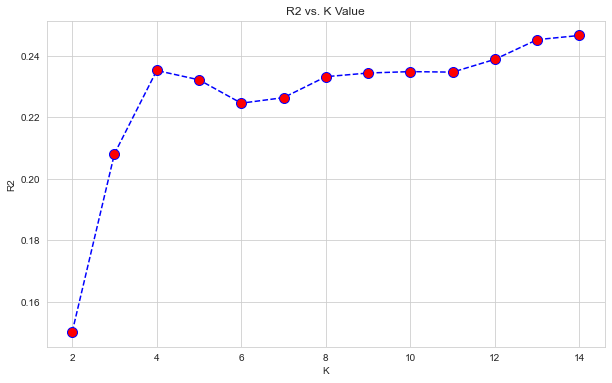

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15), scores, color = 'blue', linestyle='dashed',
marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')